In [204]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [205]:
def unique_pixel_values(image):
    # Flatten the image to a 1D array
    flattened_image = image.ravel()
    
    # Find unique pixel values and their counts
    unique_values, counts = np.unique(flattened_image, return_counts=True)
    
    # Create a dictionary to store unique pixel values and their counts
    pixel_counts = dict(zip(unique_values, counts))
    
    return pixel_counts

{0: 477275, 255: 546869}


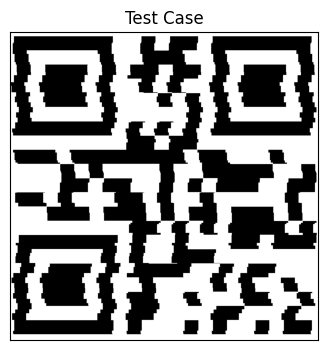

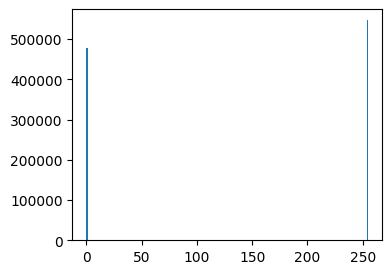

In [206]:
test_case = "test_data/5_caesar_cipher.png"
img = cv2.imread(test_case, 0)
original_img = img.copy()

img = cv2.equalizeHist(img)
_, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)

fig = plt.figure(figsize=(4, 4));
plt.xticks([], []);
plt.yticks([], []);
plt.title('Test Case')
plt.imshow(img, cmap='gray');

print(unique_pixel_values(img))
plt.figure(figsize=(4,3));
plt.hist(img.ravel(), bins=256);


In [207]:
def count_white(ref_row):
        count = 0
        for pixel in ref_row:
            if pixel == 0:
                break
            else:
                count += 1
        return count

14 [255 255 255 ... 255 255 255] 13


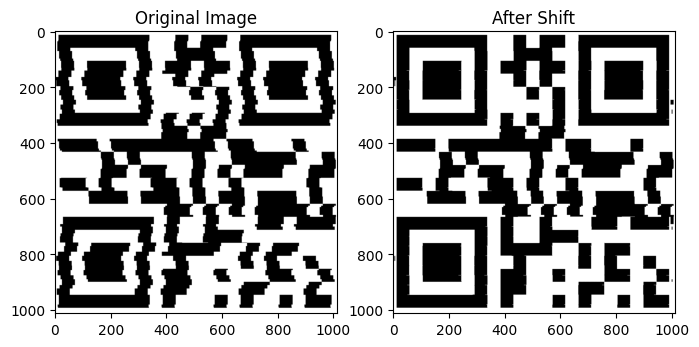

In [208]:
# Get image dimensions
height, width = img.shape

# Define the reference row (first row)
reference_index = 0
reference_row = img[0, :]

# Iterate through each row in the image
for row_index in range(1, height):
    current_row = img[row_index, :]
    
    # Count white pixels in the current row
    white_pixels_count = count_white(current_row)
    if white_pixels_count > width/4:
        continue
    else:
        reference_index = row_index
        reference_row = current_row
        reference_white_pixels_count = count_white(reference_row)
        break

print(reference_index, reference_row, reference_white_pixels_count)
        
for r in range(reference_index, height):
    current_row = img[r, :]
    white_pixels_count = count_white(current_row)
    if white_pixels_count == reference_white_pixels_count:
        # Case 1: Skip this row (aligned with the reference row)
        continue
    # elif white_pixels_count > 20:
    #     continue
    elif white_pixels_count > reference_white_pixels_count:
        # Case 2: Shift the row to the left
        shift_amount = white_pixels_count - reference_white_pixels_count
        if shift_amount < 44:
            img[r, :-shift_amount] = img[r, shift_amount:]
    else:
        # Case 3: Shift the row to the right
        shift_amount = reference_white_pixels_count - white_pixels_count
        if shift_amount < 44:
            img[r, shift_amount:] = img[r, :-shift_amount]

# Display the original and modified images using matplotlib
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(original_img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(img, cmap='gray')
plt.title('After Shift')

plt.show()

In [209]:
# def count_white_right(ref_row):
#         count = 0
#         for pixel in reversed(ref_row):
#             if pixel == 0:
#                 break
#             else:
#                 count += 1
#         return count

# # Get image dimensions
# height, width = img.shape

# # Define the reference row (first row)
# reference_index = 0
# reference_row = img[0, :]

# # Iterate through each row in the image
# for row_index in range(height - 1, 0, -1):
#     current_row = img[row_index, :]
    
#     # Count white pixels in the current row
#     white_pixels_count = count_white_right(current_row)
#     if white_pixels_count > width/4:
#         continue
#     else:
#         reference_index = row_index
#         reference_row = current_row
#         reference_white_pixels_count = count_white_right(reference_row)
#         break

# print(reference_index, reference_row, reference_white_pixels_count)
        
# for r in range(reference_index, height):
#     current_row = img[r, :]
#     white_pixels_count = count_white_right(current_row)
#     if white_pixels_count == reference_white_pixels_count:
#         # Case 1: Skip this row (aligned with the reference row)
#         continue
#     elif white_pixels_count > reference_white_pixels_count:
#         # Case 2: Shift the row to the left
#         shift_amount = white_pixels_count - reference_white_pixels_count
#         if shift_amount < 44:
#             img[r, :-shift_amount] = img[r, shift_amount:]
#     else:
#         # Case 3: Shift the row to the right
#         shift_amount = reference_white_pixels_count - white_pixels_count
#         if shift_amount < 44:
#             img[r, shift_amount:] = img[r, :-shift_amount]

# # Display the original and modified images using matplotlib
# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.imshow(original_img, cmap='gray')
# plt.title('Original Image')

# plt.subplot(1, 2, 2)
# plt.imshow(img, cmap='gray')
# plt.title('After Shift')

# plt.show()

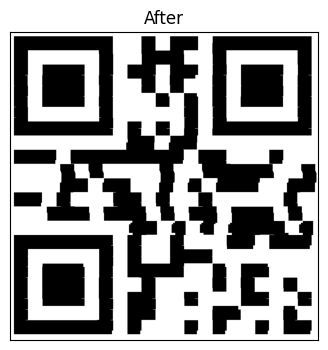

In [210]:
custom_kernel_size = 15
custom_kernel = np.ones((custom_kernel_size, custom_kernel_size), dtype=np.uint8)
img = cv2.dilate(img, custom_kernel, iterations=1)
img = cv2.erode(img, custom_kernel, iterations=1)

fig = plt.figure(figsize=(4, 4));
plt.xticks([], []);
plt.yticks([], []);
plt.title('After')
plt.imshow(img, cmap='gray');

In [211]:
start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(img):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(img[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = img.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col = img.shape[1] - col_index
            break
    if end_col != -1:
        break

print(start_row, end_row, start_col, end_col)

14 993 13 1007


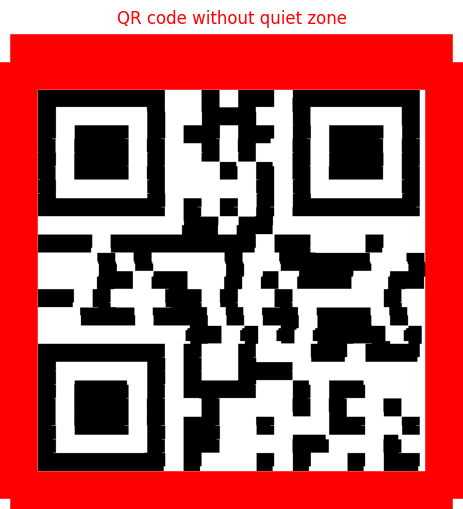

In [212]:
qr_no_quiet_zone = img[start_row:end_row, start_col:end_col]
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
fig.get_axes()[0].spines[:].set_color('red');
fig.get_axes()[0].spines[:].set_linewidth(40);
fig.get_axes()[0].spines[:].set_position(("outward", 20))
plt.title('QR code without quiet zone', y = 1.15, color='red');
plt.imshow(qr_no_quiet_zone, cmap='gray');

In [213]:
qr_no_quiet_zone.shape

(979, 994)

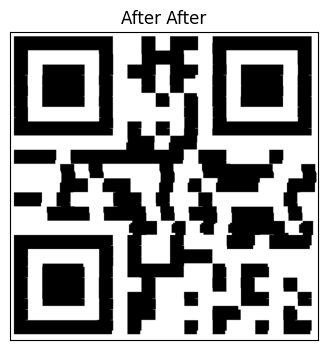

In [214]:
# Specify the desired size for the new image
new_size = (924, 924)

# Resize the original image to the new size using interpolation
resized_image = cv2.resize(img, new_size, interpolation=cv2.INTER_LINEAR)

# Display the resized image
fig = plt.figure(figsize=(4, 4));
plt.xticks([], []);
plt.yticks([], []);
plt.title('After After')
plt.imshow(resized_image, cmap='gray');


In [215]:
# size = 0
# for pixel in qr_no_quiet_zone[0]:
#     if (pixel != 0): break
#     size += 1

# print(size)

In [216]:
# # Therefore the grid cell size is..
# grid_cell_size = round(size/7)
# print(grid_cell_size)

In [217]:
# # And it each row/column is expected to have the following no. of qr_cells
# grid_cells_num = round(qr_no_quiet_zone.shape[0]/grid_cell_size)
# print(grid_cells_num)

In [218]:
# # So now it is time to split the following shape...
# print(qr_no_quiet_zone.shape)

In [219]:
grid_cells_num = 21
grid_cell_size = 44
# ...into grid cells
qr_cells = resized_image.reshape((
    grid_cells_num,
    grid_cell_size,
    grid_cells_num,
    grid_cell_size,
)).swapaxes(1, 2)
print(qr_cells.shape)

(21, 21, 44, 44)


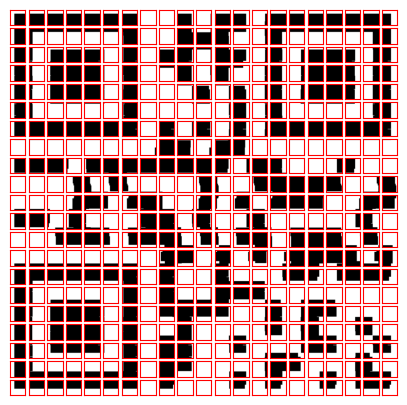

In [220]:
_, axes = plt.subplots(grid_cells_num, grid_cells_num, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        col.imshow(qr_cells[i][j], cmap="gray", vmin=0, vmax=255)
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)
        col.spines[:].set_color('red')

In [221]:
qr_cells_numeric = np.ndarray((grid_cells_num, grid_cells_num), dtype=np.uint8)
for i, row in enumerate(qr_cells):
    for j, cell in enumerate(row):
        qr_cells_numeric[i, j] = (np.median(cell) // 255)

print(qr_cells_numeric)

[[0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1]
 [0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0]
 [0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0]
 [0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1]
 [0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1]
 [1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0]
 [1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0]
 [0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1]
 [1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1]
 [1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1]
 [0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1]
 [0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1]
 [0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1]
 [0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1]
 [0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1]
 [1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1]]


In [222]:
# We want row #8
qr_cells_numeric[8]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1],
      dtype=uint8)

In [223]:
# The first two bits determine the error correction level
# Level L (Low)         [11]	7%  of data bytes can be restored.
# Level M (Medium)      [10]	15% of data bytes can be restored.
# Level Q (Quartile)    [01]	25% of data bytes can be restored.
# Level H (High)        [00]	30% of data bytes can be restored.
ecl = [int(not(c)) for c in qr_cells_numeric[8, 0:2]]
# Why "not"? Because the standard uses '1's for black and '0's for white
#
# "A dark module is a binary one and a light module is a binary zero."
#  - ISO/IEC 18004:2000(E)
#
# In image processing, we use them the other way.. Hence the inversion
print(ecl)

[1, 1]


In [224]:
# Dictionary of all masks and their equivalent formulae
MASKS = {
    "000": lambda i, j: (i * j) % 2 + (i * j) % 3 == 0,
    "001": lambda i, j: (i / 2 + j / 3) % 2 == 0,
    "010": lambda i, j: ((i * j) % 3 + i + j) % 2 == 0,
    "011": lambda i, j: ((i * j) % 3 + i * j) % 2 == 0,
    "100": lambda i, j: i % 2 == 0,
    "101": lambda i, j: (i + j) % 2 == 0,
    "110": lambda i, j: (i + j) % 3 == 0,
    "111": lambda i, j: j % 3 == 0,
}

# Same row as above, the three cells after the ecl cells (converted to a string)
mask = [int(not(c)) for c in qr_cells_numeric[8, 2:5]]
mask_str = ''.join([str(c) for c in mask])
print(mask_str)

101


In [225]:
# Same row as above, but we want cells #5 and #7 (#6 is always set to 0),
#  followed by column #8 from cell #0 in it to cell #7 (and skipping #6)
fec = []
fec.append(qr_cells_numeric[8, 5])
fec.append(qr_cells_numeric[8, 7])
fec.extend(qr_cells_numeric[0:6, 8])
fec.extend(qr_cells_numeric[7:9, 8])
fec = [int(not(c)) for c in fec]
print(fec)

[1, 1, 0, 0, 1, 0, 0, 0, 1, 1]


In [226]:
# So in total we have the following 15 bits of format info from our QR code
print(ecl, mask, fec)

[1, 1] [1, 0, 1] [1, 1, 0, 0, 1, 0, 0, 0, 1, 1]


In [227]:
# # Let's cross-check with our example
# _, axes = plt.subplots(grid_cells_num, grid_cells_num, figsize=(5, 5))
# for i, row in enumerate(axes):
#     for j, col in enumerate(row):

#         col.get_xaxis().set_visible(False)
#         col.get_yaxis().set_visible(False)
#         if (i == 8 and j <= 8) or (i <= 8 and j == 8):
#             if (i != 6) and (j != 6):
#                 col.imshow(qr_cells[i][j], cmap="gray", vmin=0, vmax=255)
#                 col.spines[:].set_color('red')
#                 continue
#         col.imshow(qr_cells[i][j], cmap="gray", vmin=-1275, vmax=510)

In [228]:
# However..... You need to XOR that with the "format mask": 101010000010010
ecl[0] ^= 1
mask[0] ^= 1
mask[2] ^= 1
fec[5] ^= 1
fec[8] ^= 1

# And now we print...
print(ecl, mask, fec)

[0, 1] [0, 0, 0] [1, 1, 0, 0, 1, 1, 0, 0, 0, 1]


In [229]:
# Before we proceed, let's write a function for masking to make our lives easier
UP, UP_ENC, DOWN, CW, CCW = range(5)  # A rather old-fashioned pythonic "Enum"

def apply_mask(data_start_i, data_start_j, direction):
    '''
    data_start_i/j represent the first cell's coords in its respective direction
    direction is the masking direction, up(-enc)/down/clockwise/anti-clockwise
    '''
    result = []
    row_offsets = []
    col_offsets = []
    if (direction in [UP, UP_ENC]):
        row_offsets = [0,  0, -1, -1, -2, -2, -3, -3]
        col_offsets = [0, -1,  0, -1,  0, -1,  0, -1]
    if (direction == DOWN):
        row_offsets = [0,  0,  1,  1,  2,  2,  3,  3]
        col_offsets = [0, -1,  0, -1,  0, -1,  0, -1]
    if (direction == CW):
        row_offsets = [0,  0,  1,  1,  1,  1,  0,  0]
        col_offsets = [0, -1,  0, -1, -2, -3, -2, -3]
    if (direction == CCW):
        row_offsets = [0,  0, -1, -1, -1, -1,  0,  0]
        col_offsets = [0, -1,  0, -1, -2, -3, -2, -3]

    for i, j in zip(row_offsets, col_offsets):
        cell = qr_cells_numeric[data_start_i+i, data_start_j+j]
        result.append(int(cell if MASKS[mask_str](data_start_i+i, data_start_j+j) else not cell))

    return result[:4] if direction == UP_ENC else result

In [230]:
enc = apply_mask(grid_cells_num-1, grid_cells_num-1, UP_ENC)
print(enc)

[1, 1, 0, 0]


In [231]:
len = apply_mask(grid_cells_num-3, grid_cells_num-1, UP)
print(len)

[1, 0, 0, 0, 1, 0, 0, 1]


In [232]:
data_starting_indices = [
    [grid_cells_num-7, grid_cells_num-1, UP],
    [grid_cells_num-11, grid_cells_num-1, CCW],
    [grid_cells_num-10, grid_cells_num-3, DOWN],
    [grid_cells_num-6, grid_cells_num-3, DOWN],
    [grid_cells_num-2, grid_cells_num-3, CW],
    [grid_cells_num-3, grid_cells_num-5, UP],
    [grid_cells_num-7, grid_cells_num-5, UP],
    [grid_cells_num-11, grid_cells_num-5, CCW],
    [grid_cells_num-10, grid_cells_num-7, DOWN],
    [grid_cells_num-6, grid_cells_num-7, DOWN],
    [grid_cells_num-2, grid_cells_num-7, CW],
    [grid_cells_num-3, grid_cells_num-9, UP],
    [grid_cells_num-7, grid_cells_num-9, UP],
    [grid_cells_num-11, grid_cells_num-9, UP],
    [grid_cells_num-16, grid_cells_num-9, UP],
    [grid_cells_num-20, grid_cells_num-9, CCW],
    [grid_cells_num-19, grid_cells_num-11, DOWN],
    [grid_cells_num-14, grid_cells_num-11, DOWN],
    [grid_cells_num-10, grid_cells_num-11, DOWN],
    [grid_cells_num-6, grid_cells_num-11, DOWN],
    # Hmm..? I actually don't know how to proceed now lol
]

ans = ''
for a, b, d in data_starting_indices:
    bits = apply_mask(a, b, d)
    bit_string = ''.join([str(bit) for bit in bits])
    if bit_string[:4] == "0000":
        print(f'{bit_string[:4]} = 0 (NULL TERMINATOR)')
        break
    ans += chr(int(bit_string, 2)) # converts to binary to int, then to ASCII
    print(f'{bit_string} = {ans[-1]}')

print(f'\nDecoded string: {ans}')

11111100 = ü
01110010 = r
01111000 = x
01100110 = f
01101001 = i
00110001 = 1
01100101 = e
01101000 = h
00110010 = 2
0000 = 0 (NULL TERMINATOR)

Decoded string: ürxfi1eh2
